In [19]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.manifold import TSNE
data = pd.read_csv('../DATASET/Hasil_Gabungan.csv')

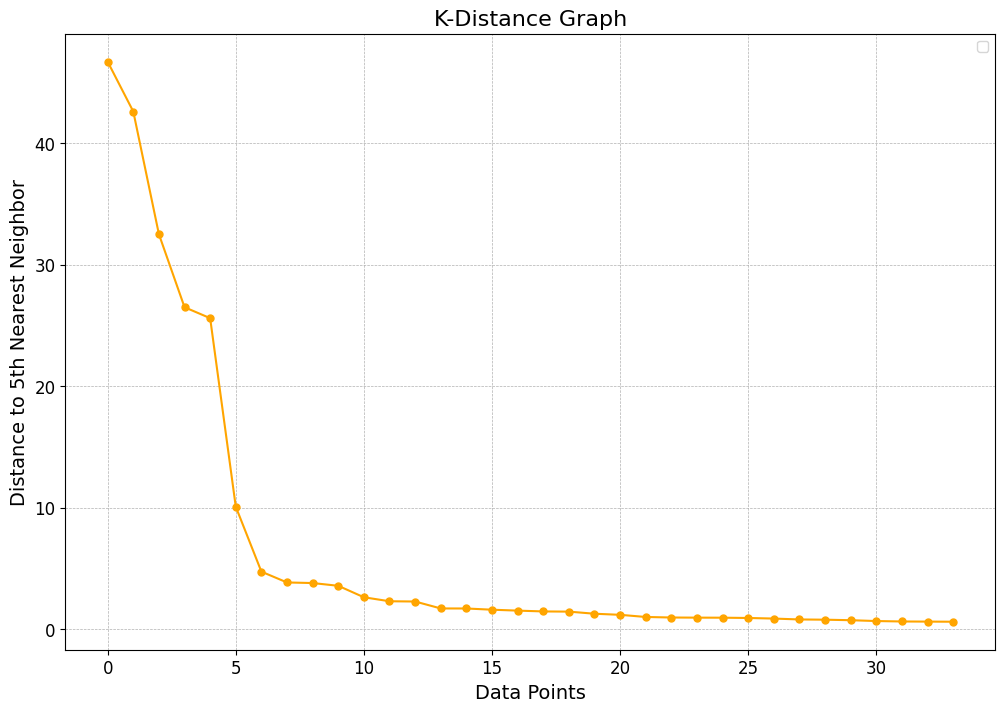

In [56]:
featuress = [
    'Residential_2021', 'Industrial_2021', 'Business_2021', 'Social_2021', 'Gov_Office_2021', 
    'Pub_Street_2021', 'Total_2021', 'Residential_2022', 'Industrial_2022', 'Business_2022', 
    'Social_2022', 'Gov_Office_2022', 'Pub_Street_2022', 'Total_2022', 'Residential', 
    'Industrial', 'Business', 'Social', 'Gov_Office', 'Pub_Street', 'Total', 
    'JP_2021', 'JP_2022', 'JP_2023', 'KP_2021', 'KP_2022', 'KP_2023'
]

data_T = data[featuress]
scaler = RobustScaler()
scaled_features = scaler.fit_transform(data_T)

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)

distances = sorted(distances[:,4], reverse=True)

plt.figure(figsize=(12, 8))
plt.plot(distances, color='orange', linestyle='-', marker='o', markersize=5)
plt.title("K-Distance Graph", fontsize=16)
plt.xlabel("Data Points", fontsize=14)
plt.ylabel("Distance to 5th Nearest Neighbor", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()

plt.show()

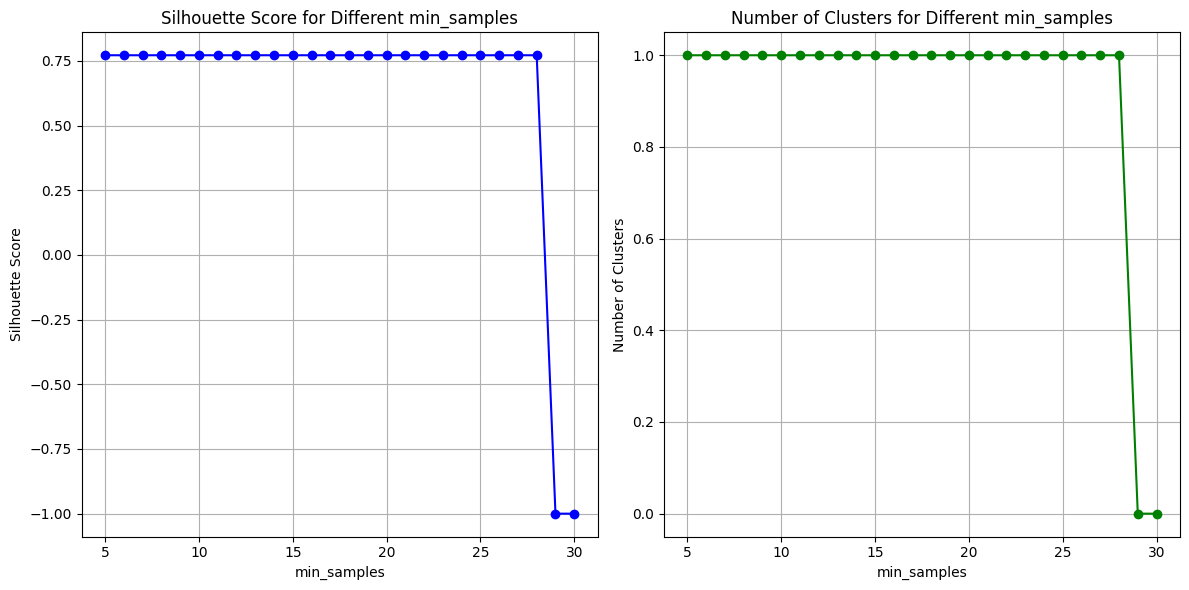

Best min_samples: 5
Best Silhouette Score: 0.7721890530880667
Number of clusters: 1
Number of outliers: 6


In [57]:
dataS = data[featuress] 
scaler = RobustScaler()
scaled_features = scaler.fit_transform(dataS)

def analyze_min_samples(X, eps=6, min_samples_range=range(5, 31)):
    silhouette_scores = []
    num_clusters_list = []
    num_outliers_list = []

    for min_samples in min_samples_range:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X)

        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
        else:
            score = -1  

        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  
        num_outliers = list(labels).count(-1)
        
        silhouette_scores.append(score)
        num_clusters_list.append(num_clusters)
        num_outliers_list.append(num_outliers)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(min_samples_range, silhouette_scores, marker='o', color='b', label="Silhouette Score")
    plt.xlabel('min_samples')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Different min_samples')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(min_samples_range, num_clusters_list, marker='o', color='g', label="Number of Clusters")
    plt.xlabel('min_samples')
    plt.ylabel('Number of Clusters')
    plt.title('Number of Clusters for Different min_samples')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    best_score_idx = np.argmax(silhouette_scores)
    best_min_samples = min_samples_range[best_score_idx]
    best_score = silhouette_scores[best_score_idx]

    print(f"Best min_samples: {best_min_samples}")
    print(f"Best Silhouette Score: {best_score}")
    print(f"Number of clusters: {num_clusters_list[best_score_idx]}")
    print(f"Number of outliers: {num_outliers_list[best_score_idx]}")

analyze_min_samples(scaled_features, eps=6)


In [66]:
dbscan = DBSCAN(eps=9, min_samples=16)
clusters = dbscan.fit_predict(scaled_features)
data['Cluster'] = clusters
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
clusters_modified = clusters.copy()
clusters_modified[clusters == -1] = num_clusters 

data['Cluster'] = clusters_modified

provinsi_cluster = data[['Province', 'Cluster']]
for cluster in set(clusters_modified):
    print(f"\nProvinsi yang masuk dalam Cluster {cluster}:")
    print(provinsi_cluster[provinsi_cluster['Cluster'] == cluster]['Province'].to_list())

num_clusters_modified = len(set(clusters_modified)) - (1 if -1 in clusters_modified else 0)
num_outliers_modified = list(clusters_modified).count(num_clusters)  

print(f"\nJumlah klaster yang ditemukan setelah modifikasi (termasuk outliers sebagai klaster): {num_clusters_modified}")
print(f"Jumlah outlier yang dianggap klaster baru: {num_outliers_modified}")

if num_clusters_modified > 1:
    sil_score = silhouette_score(scaled_features, clusters_modified)
    print(f"Silhouette Score: {sil_score}")
else:
    print("Silhouette Score tidak dapat dihitung karena hanya ada 1 klaster atau semua data dianggap outliers.")



Provinsi yang masuk dalam Cluster 0:
['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Barat', 'Maluku', 'Maluku Utara', 'Papua', 'Papua Barat', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']

Provinsi yang masuk dalam Cluster 1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']

Jumlah klaster yang ditemukan setelah modifikasi (termasuk outliers sebagai klaster): 2
Jumlah outlier yang dianggap klaster baru: 5
Silhouette Score: 0.8098681704159247


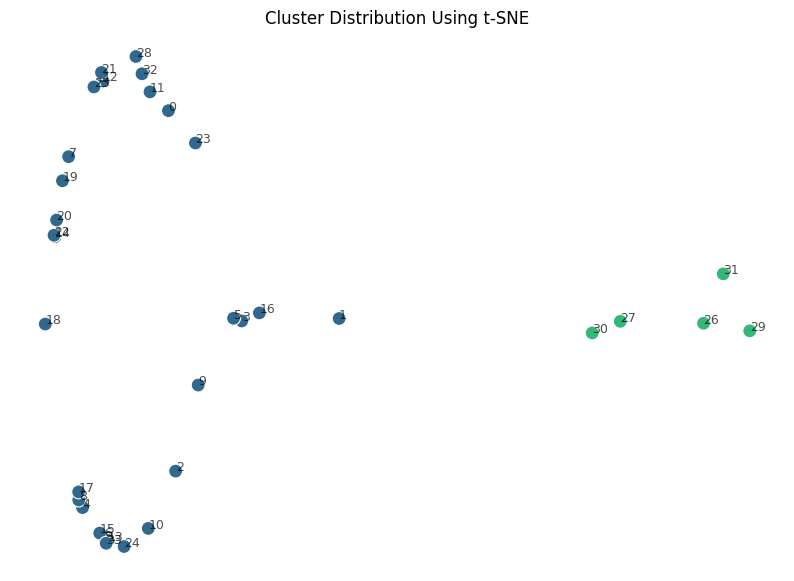


Index Provinsi dan Nama Provinsi:
Index 0: Aceh
Index 1: Sumatera Utara
Index 2: Sumatera Barat
Index 3: Riau
Index 4: Kep. Riau
Index 5: Sumatera Selatan
Index 6: Jambi
Index 7: Bengkulu
Index 8: Kep. Bangka Belitung
Index 9: Lampung
Index 10: Kalimantan Barat
Index 11: Kalimantan Selatan
Index 12: Kalimantan Tengah
Index 13: Sulawesi Utara
Index 14: Gorontalo
Index 15: Sulawesi Tengah
Index 16: Sulawesi Selatan
Index 17: Sulawesi Tenggara
Index 18: Sulawesi Barat
Index 19: Maluku
Index 20: Maluku Utara
Index 21: Papua
Index 22: Papua Barat
Index 23: Bali
Index 24: Nusa Tenggara Barat
Index 25: Nusa Tenggara Timur
Index 26: Jawa Timur
Index 27: Jawa Tengah
Index 28: DI Yogyakarta
Index 29: Jawa Barat
Index 30: Banten
Index 31: DKI Jakarta
Index 32: Kalimantan Timur
Index 33: Kalimantan Utara


In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scaled_features)

df_tsne = pd.DataFrame(data=X_tsne, columns=['tSNE1', 'tSNE2'])
df_tsne['Cluster'] = clusters_modified
df_tsne['Provinsi'] = data['Province'].tolist()

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_tsne, x='tSNE1', y='tSNE2', hue='Cluster', palette='viridis', s=100, legend=None)

for i in range(len(df_tsne)):
    plt.text(df_tsne.loc[i, 'tSNE1'], df_tsne.loc[i, 'tSNE2'], str(i), fontsize=9, alpha=0.7)

plt.title('Cluster Distribution Using t-SNE')
plt.axis('off')  
plt.show()

print("\nIndex Provinsi dan Nama Provinsi:")
for i, province in enumerate(df_tsne['Provinsi']):
    print(f"Index {i}: {province}")


In [72]:
# Perform t-SNE transformation
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scaled_features)

# Create DataFrame with t-SNE components and cluster assignments
df_tsne = pd.DataFrame(data=X_tsne, columns=['tSNE1', 'tSNE2'])
df_tsne['Provinsi'] = data['Province'].tolist()

# KMeans Clustering
df_tsne['KMeans_Cluster'] = kmeans.labels_

# DBSCAN Clustering
df_tsne['DBSCAN_Cluster'] = clusters_modified

# K-Medoids Clustering
df_tsne['KMedoids_Cluster'] = labels  # Use the appropriate labels from KMedoids

# FCM Clustering
df_tsne['FCM_Cluster'] = labels  # Use the appropriate labels from FCM

# Plot results for KMeans
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_tsne, x='tSNE1', y='tSNE2', hue='KMeans_Cluster', palette='viridis', s=100, legend=None)
plt.title('KMeans Clustering Using t-SNE')

# Plot results for DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_tsne, x='tSNE1', y='tSNE2', hue='DBSCAN_Cluster', palette='viridis', s=100, legend=None)
plt.title('DBSCAN Clustering Using t-SNE')

plt.tight_layout()
plt.show()


NameError: name 'labels' is not defined

In [24]:
import folium
import geopandas as gpd

geo_data = gpd.read_file('../DATASET/id.json')

geo_data['name'] = geo_data['name'].replace('Jakarta Raya', 'DKI Jakarta')
geo_data['name'] = geo_data['name'].replace('Kepulauan Riau', 'Kep. Riau')
geo_data['name'] = geo_data['name'].replace('Yogyakarta', 'DI Yogyakarta')
geo_data['name'] = geo_data['name'].replace('Bangka-Belitung', 'Kep. Bangka Belitung')
geo_data['name'] = geo_data['name'].replace('North Kalimantan', 'Kalimantan Utara')

merged_data = geo_data.merge(data, left_on='name', right_on='Province')

m = folium.Map(location=[-6.1751, 106.8650], zoom_start=5)

cluster_colors = {
    1: 'blue',  
    0: 'green', 
    -1: 'red'    
}

for cluster in merged_data['Cluster'].unique():
    cluster_data = merged_data[merged_data['Cluster'] == cluster]

    for _, row in cluster_data.iterrows():
        folium.Marker(
            location=[row['geometry'].centroid.y, row['geometry'].centroid.x],
            popup=row['name'],
            icon=folium.Icon(color=cluster_colors[cluster])
        ).add_to(m)


m



In [25]:
import leafmap as lf
import geopandas as gpd

geo_data = gpd.read_file('../DATASET/id.json')

geo_data['name'] = geo_data['name'].replace('Jakarta Raya', 'DKI Jakarta')
geo_data['name'] = geo_data['name'].replace('Kepulauan Riau', 'Kep. Riau')
geo_data['name'] = geo_data['name'].replace('Yogyakarta', 'DI Yogyakarta')
geo_data['name'] = geo_data['name'].replace('Bangka-Belitung', 'Kep. Bangka Belitung')
geo_data['name'] = geo_data['name'].replace('North Kalimantan', 'Kalimantan Utara')

merged_data = geo_data.merge(data, left_on='name', right_on='Province')

m = lf.Map(center=[-6.1751, 106.8650], zoom=5)

cluster_colors = {
    1: 'blue',  
    0: 'green', 
    -1: 'red'    
}

for cluster in merged_data['Cluster'].unique():
    cluster_data = merged_data[merged_data['Cluster'] == cluster]

    cluster_data['color'] = cluster_data['Cluster'].map(cluster_colors)

    m.add_gdf(cluster_data, layer_name=f"Cluster {cluster}", color_col="color")

m.add_layer_control()

m

Map(center=[-6.1751, 106.865], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…